In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **Loading data and creating Signals objects**

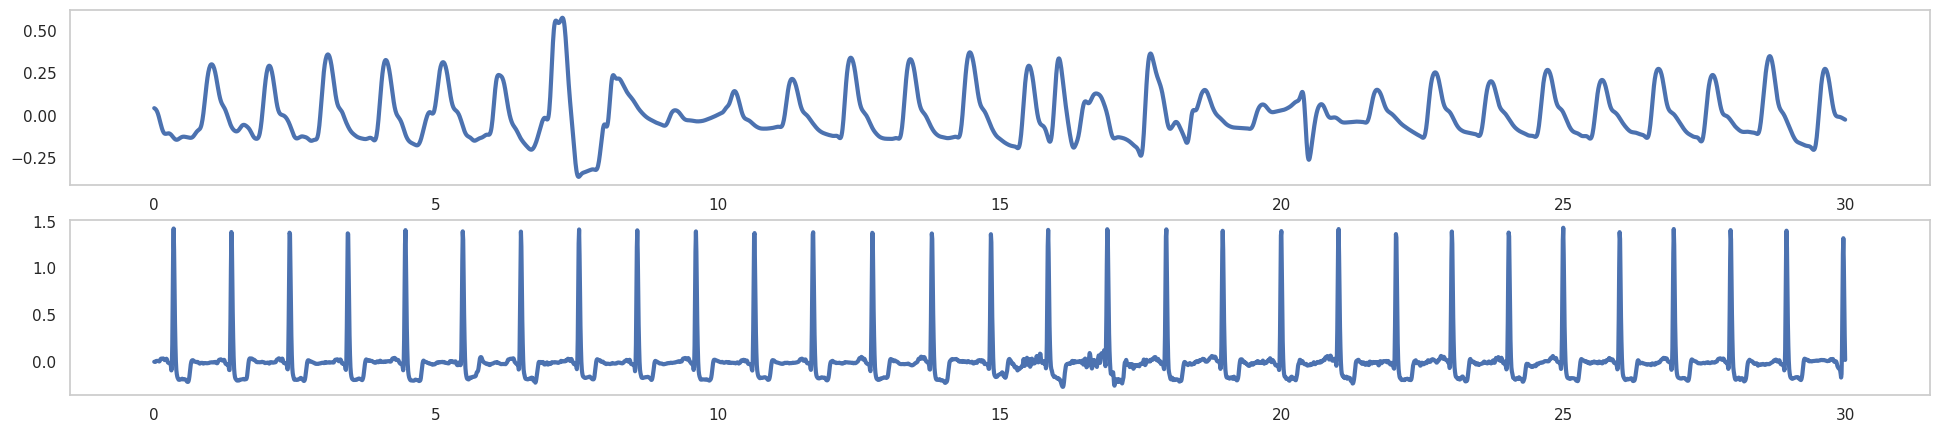

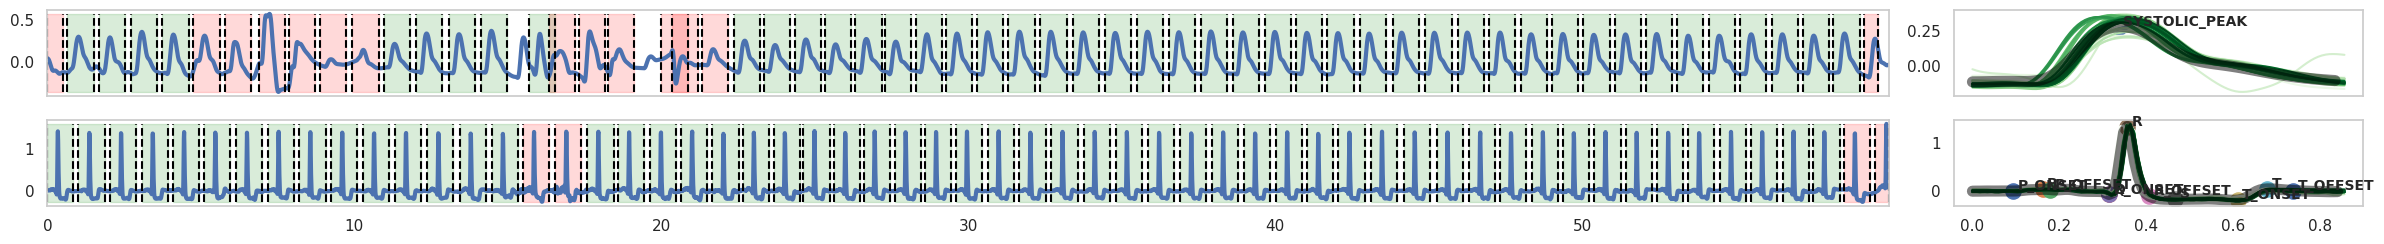

In [3]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[111]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_peaks_loc=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'basic__entropy': 6.107826741287289,
 'basic__zero_num_crosses': 4,
 'basic__zero_pos_cross_std': 0.0,
 'basic__zero_neg_cross_std': 0.0,
 'basic__mean_num_crosses': 109,
 'basic__mean_pos_cross_std': 51.2624946781422,
 'basic__mean_neg_cross_std': 65.75232292338936,
 'basic__percentile_5': 0.2434017595307918,
 'basic__percentile_25': 0.27370478983382207,
 'basic__percentile_75': 0.5261485826001955,
 'basic__percentile_95': 0.7341153470185728,
 'basic__median': 0.3651026392961877,
 'basic__mean': 0.41408602150537627,
 'basic__std': 0.1749149259367435,
 'basic__var': 0.030595231315456457,
 'basic__root_mean_square': 0.41408602150537627,
 'basic__kurtosis': -0.1153729816950051,
 'basic__skew': 0.6252704982333603,
 'basic__energy': 1515.4684839120578,
 'peaks_troughs__peaks__entropy': 4.027145235751314,
 'peaks_troughs__peaks__zero_num_crosses': 0,
 'peaks_troughs__peaks__zero_pos_cross_std': -1,
 'peaks_troughs__peaks__zero_neg_cross_std': -1,
 'peaks_troughs__peaks__mean_num_crosses': 

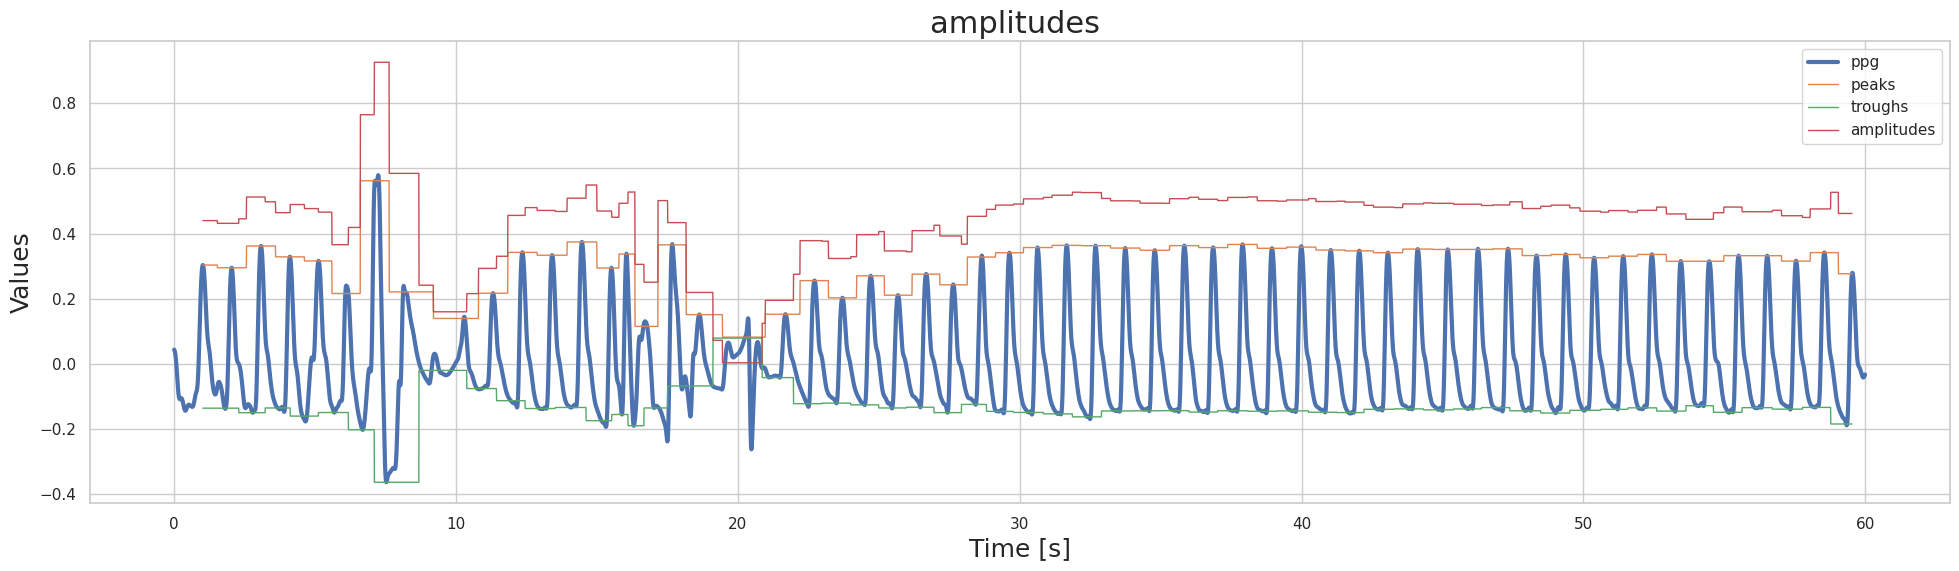

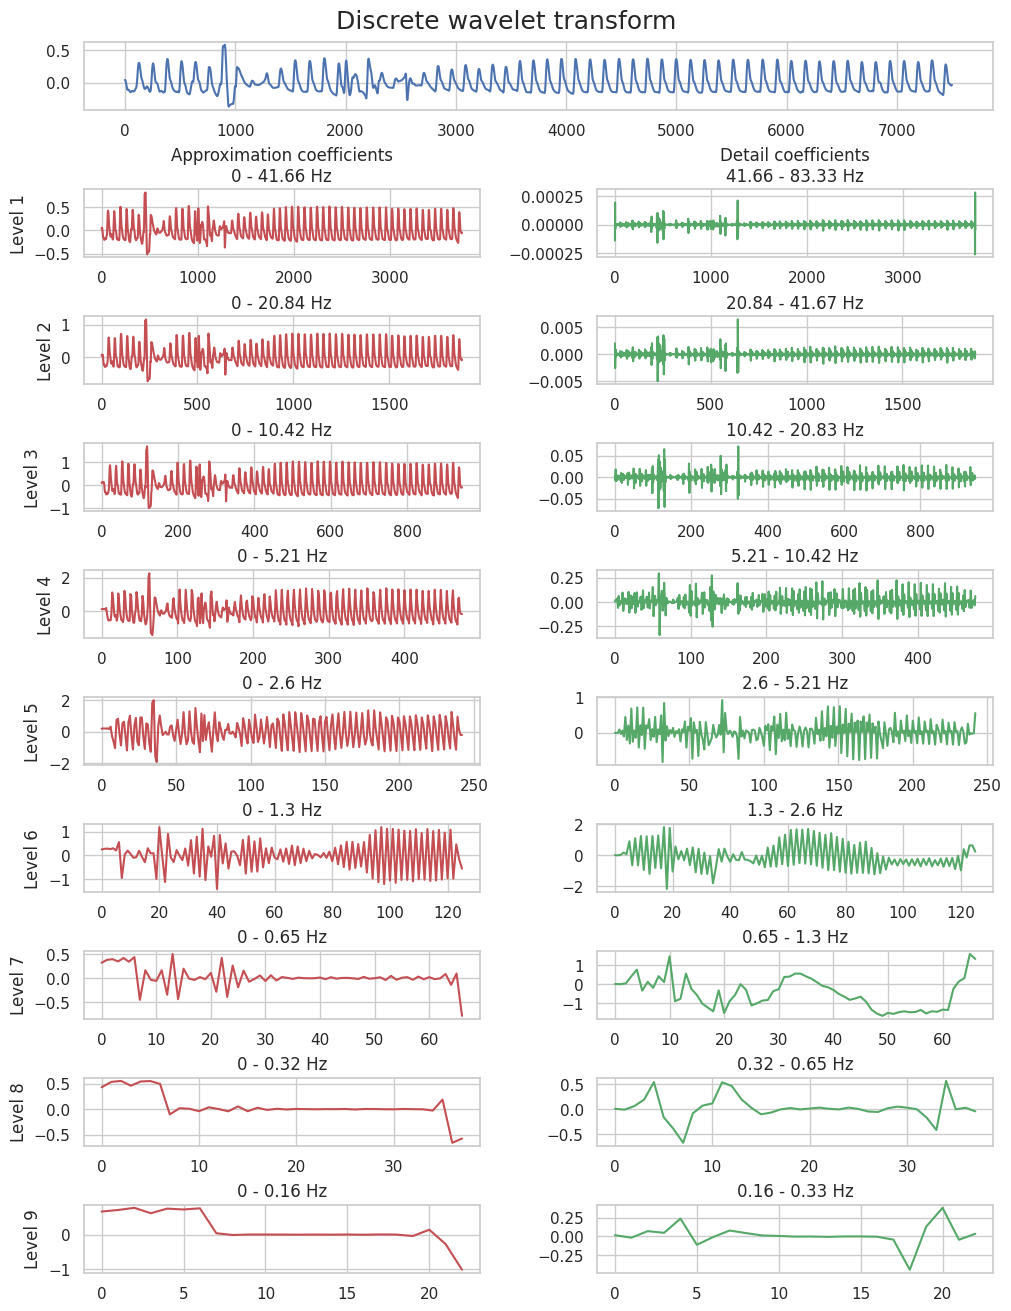

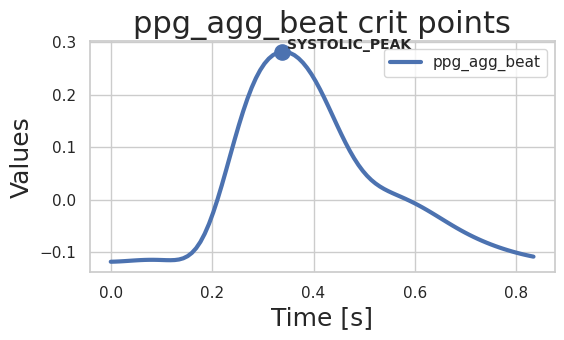

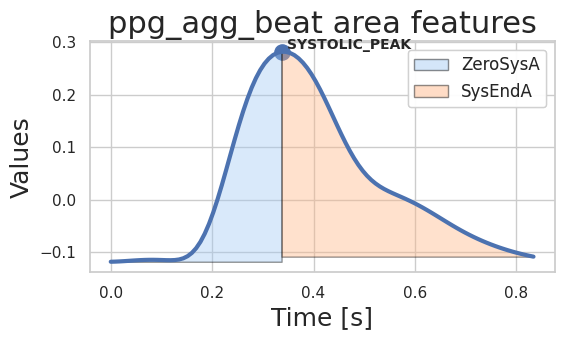

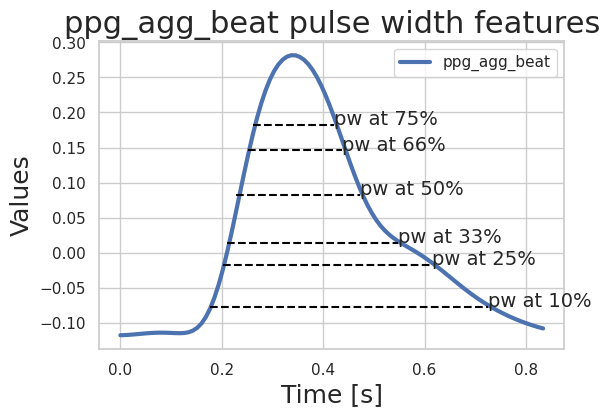

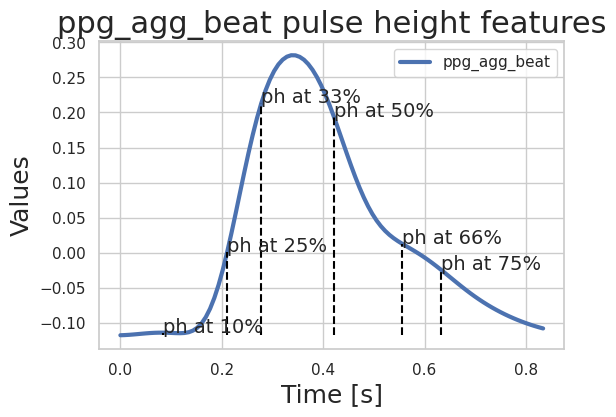

In [32]:
ppg_sig.extract_features(False, True)